                                        # PCA (Principal Component Analysis)    (Temel Bileşenler Analizi)


# Veri setlerimiziden hatırlarsanız her veri setinin birçok feature'a sahipti. Bu feature'lara makine öğrenmesi jargonunda aynı zamanda boyut da denilmektedir. 

# If you remember from our data sets, each data set had many features. These features are also called dimensions in machine learning jargon.

# features = Özellik = Makine öğrenmesinde boyutta denir.


# PCA ile biz çok boyutlu veri setlerini, veri setinin anlamını kaybetmeden daha az boyutlu bir hale getirmeyi amaçlarız.

# With PCA, we aim to make multidimensional data sets less dimensional without losing the meaning of the data set.

In [5]:
# Neden PCA Yaparız?        # Why Do We Do PCA?

# 1) Çok fazla boyutlu veri setlerini kolay gösterebilmek için. 
# 1) To easily display multidimensional data sets.

# 2) Verileri sıkıştırmak için.  Meslea PCA kullanarak büyük boyuttaki dijital fotoğraf dosyalarını daha küçük formatlara sıkıştırma yapılabilir. 
# 2) To compress data.  For example, using PCA, large digital photo files can be compressed into smaller formats. 

### PCA yapılırken eigenvektörler çıkarılır. Bu eigen vektörler daha sonra PCA 1.boyut ve PCA 2.boyut, ... Pca N.boyut şeklinde N boyuta indirgenir. N = düşürülmek istenen boyut sayısıdır.

### Bu işlemler yapılırken varyans % 90'dan fazla bir oranda korunmaya çalışılır. Yani minimum kayıp gerçekleşir.





### Eigenvectors are removed when performing PCA. These eigenvectors are then reduced to N dimensions as PCA 1st dimension and PCA 2nd dimension, ... Pca Nth dimension. N = the number of dimensions to be reduced.

### While performing these operations, more than 90% of the variance is tried to be preserved. So minimum loss occurs.

### Nerelerde kullanılır?

# Veri sıkıştırma
# Fotoğraf sıkıştırma
# Face recognition algoritmaları çalıştırılmadan önce bu işlem yapılarak insan yüzüne ait sadece en belirgin özellikler elde edilir.

### Where to use?

# Data compression
# Photo compression
# By performing this process before running face recognition algorithms, only the most distinctive features of the human face are obtained.

                                             # PCA - Principal Component Analysis
# Bu dersimizde örnek olarak kullacağımız veri seti yapay öğrenme alanının en popüler veri setlerinden "İris" veri seti. İris veri seti 3 İris bitki türüne (İris setosa, İris Virginica ve İris Versicolor) ait, her bir türden 50 örnek olmak üzere toplam örnek sayısına sahip bir veri setidir. Her bir örnek için 4 özellik tanımlanmıştır. Taç yaprak uzunluğu, taç yaprak genişliği, çanak yaprak genişliği, çanak yaprak uzunluğu.

# Veri setimizde her bir bitki örneği ayri bir gözlemi (örneği) ifade ederken, bitki tür ismi bağimli (Dependent) değişken, bitkilerin ölçülen 4 temel özelliği ise bağımsız (independent) değikenleri ifade eder.





# The data set we will use as an example in this lesson is the "Iris" data set, one of the most popular data sets in the field of artificial learning. The Iris data set is a data set with a total number of samples of 3 Iris plant species (Iris setosa, Iris Virginica and Iris Versicolor), 50 samples from each species. 4 features are defined for each sample. Petal length, petal width, sepal width, sepal length.

# In our data set, each plant sample represents a separate observation (sample), the plant species name represents the dependent variable, and the four measured basic characteristics of the plants represent independent variables.
                                                          

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# StandardScaler, scikit-learn kütüphanesinin bir parçası olan bir araçtır ve genellikle veri ön işleme aşamasında kullanılır. Özellikle makine öğrenimi algoritmalarında, verilerin belirli bir aralığa veya dağılıma getirilmesi, algoritmaların daha iyi performans göstermesine yardımcı olabilir.

# StandardScaler'ın İşlevi:
# Ortalama ve Standart Sapma Hesaplama: StandardScaler, verilerin her bir özelliğinin ortalamasını ve standart sapmasını hesaplar.
# Veri Dönüştürme: Verileri, her bir özelliğin ortalamasını 0, standart sapmasını ise 1 olacak şekilde dönüştürür.
# Bu işlem, verilerin birbirleriyle karşılaştırılabilir hale gelmesini sağlar ve makine öğrenimi algoritmalarının daha iyi performans göstermesine yardımcı olabilir. Örneğin, bazı algoritmalar (örneğin, gradyan iniş algoritmaları) belirli bir veri ölçeği gerektirebilir.



# StandardScaler is a tool that is part of the scikit-learn library and is often used in the data preprocessing phase. Particularly with machine learning algorithms, bringing data into a certain range or distribution can help algorithms perform better.

# Function of StandardScaler:
# Mean and Standard Deviation Calculation: StandardScaler calculates the mean and standard deviation of each feature of the data.
# Data Transformation: Transforms the data so that the mean of each feature is 0 and the standard deviation is 1.
# This process makes data comparable to each other and can help machine learning algorithms perform better. For example, some algorithms (e.g., gradient descent algorithms) may require a certain scale of data.






# PCA (Principal Component Analysis) sınıflandırma ve regresyon gibi çeşitli makine öğrenimi görevlerinde kullanılan güçlü bir boyut indirgeme tekniğidir. sklearn.decomposition modülünden PCA sınıfı, verilerinizin boyutlarını azaltarak önemli özellikleri ve yapıları korurken veri setinizin boyutunu küçültmenizi sağlar. Bu, veri görselleştirme, model performansını artırma ve hesaplama kaynaklarını verimli kullanma gibi amaçlar için faydalı olabilir.


# PCA (Principal Component Analysis) is a powerful dimensionality reduction technique used in various machine learning tasks such as classification and regression. The PCA class from the sklearn.decomposition module allows you to reduce the size of your data set while preserving important features and structures by reducing the dimensions of your data. This can be useful for purposes such as data visualization, improving model performance, and using computational resources efficiently.

In [10]:
url = "pca_iris.data"
# Data setimizi Pandas Dataframe içine yüklüyoruz.

df = pd.read_csv(url, names = ["sepal length", "sepal width", "petal length", "petal width", "target"])

df


# sepal length = sepal uzunluğu
# sepal width = sepal genişliği
# petal length = taç yaprağı uzunluğu
# petal width = petal width
# target = hedef

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Makine öğrenmesinde "features" (özellikler veya nitelikler) bir veri setindeki bireysel değişkenler veya girdilerdir. Bu özellikler, modelin öğrenmesi gereken bilgi parçalarını temsil eder ve genellikle modelin tahminler yapabilmesi için gerekli olan tüm veriyi içerir.

# Features Nedir?

# Features: Modelinizin verileri anlaması ve öğrenmesi için kullandığı girdi değişkenleridir. Her bir özellik, veri setindeki bir niteliyi veya ölçümü temsil eder.



# In machine learning, "features" are individual variables or inputs in a data set. These features represent the pieces of information the model needs to learn and usually contain all the data the model needs to make predictions.

# What is Features?

# Features: These are the input variables that your model uses to understand and learn from the data. Each feature represents an attribute or measurement in the data set.

In [13]:
features = ["sepal length", "sepal width", "petal length", "petal width"]

# feature'ları x olarak ayıralım:
x = df[features]

# target'i y olarak ayıralım:
y = df[["target"]]


# Makine öğrenmesinde "ölçekleme" (scaling), verilerdeki özelliklerin belirli bir ölçek aralığına veya dağılıma dönüştürülmesi işlemidir. Özellikle farklı ölçeklerdeki özelliklerin bir arada kullanıldığı durumlarda ölçekleme, modelin performansını artırabilir.

# Neden Ölçekleme Yapılır?
# Özelliklerin Aynı Ölçek Düzeyine Getirilmesi:

# Farklı özellikler genellikle farklı ölçü birimlerine sahip olabilir (örneğin, bir özellik metrekare cinsinden, diğer özellik ise kilogram cinsindendir). Özelliklerin benzer ölçeklerde olması, modelin öğrenme sürecini daha etkili hale getirebilir.
# Algoritma Performansı ve Kararlılığı:

# Bazı makine öğrenmesi algoritmaları, verilerin belirli bir ölçek aralığında olmasını gerektirir. Örneğin, gradyan iniş algoritması, farklı ölçeklerdeki özelliklerle düzgün çalışmayabilir. Ayrıca, bazı algoritmalar (örneğin, K-en yakın komşu ve SVM) mesafe hesaplamalarına dayandığı için ölçeklenmiş veriler daha doğru sonuçlar verebilir.
# Veri Dağılımını Dengede Tutma:

# Özellikler arasındaki büyük ölçek farkları, bazı özelliklerin modelde daha fazla etkili olmasına neden olabilir. Ölçekleme, bu dengesizliği giderir.


# Ölçekleme Yöntemleri
# 1)Min-Max Ölçekleme:

# Özellikleri belirli bir aralığa (genellikle [0, 1]) dönüştürür


​
# 2) Standardizasyon (Z-Score Normalizasyonu):

# Özellikleri, ortalaması 0 ve standart sapması 1 olacak şekilde dönüştürür. Bu, verinin standart normal dağılıma uygun hale getirilmesini sağlar.
​

# 3) Robust Ölçekleme:

# Özellikleri medyan ve interquartile range (IQR) kullanarak ölçekler. Bu yöntem, veri setindeki aykırı değerlere karşı daha dayanıklıdır.

# 4) Normalizasyon:

# Özellikleri bir norm (örneğin, L2 normu) kullanarak ölçekler, böylece özelliklerin toplamı veya uzunluğu belirli bir değere ulaşır.









# "Scaling" in machine learning is the process of transforming the features in the data to a certain scale range or distribution. Scaling can improve the performance of the model, especially when features at different scales are used together.

# Why Scaling?
# Bringing Features to the Same Scale Level:

# Different properties can often have different units of measurement (for example, one property is in square meters and the other property is in kilograms). Having features at similar scales can make the learning process of the model more effective.
# Algorithm Performance and Stability:

# Some machine learning algorithms require data to be within a certain scale range. For example, the gradient descent algorithm may not work properly with features at different scales. Additionally, scaled data may yield more accurate results because some algorithms (e.g., K-nearest neighbor and SVM) rely on distance calculations.
# Keeping Data Distribution Balanced:

# Large scale differences between features may cause some features to have more impact in the model. Scaling addresses this imbalance.


# Scaling Methods
#1)Min-Max Scaling:

# Converts properties to a specific range (usually [0, 1])


​
#2) Standardization (Z-Score Normalization):

# Transforms features to have a mean of 0 and a standard deviation of 1. This ensures that the data conforms to the standard normal distribution.
​

#3) Robust Scaling:

# Scales features using median and interquartile range (IQR). This method is more robust to outliers in the dataset.

#4) Normalization:

# Scales features using a norm (e.g., L2 norm) so that the sum or length of features reaches a certain value.

# Değerleri scale etmemiz gerekiyor. Çünkü her bir feature çok farklı boyutlarda ve bunların yapay zeka tarafından eşit ağırlıklarla dengelenmesi gerekiyor. Bu amaçla standart scaler kullanarak tüm veriler mean = 0 and varianve = 1 olacak şekilde değiştiriyoruz.





# We need to scale the values. Because each feature has very different dimensions and they need to be balanced with equal weights by artificial intelligence. For this purpose, we use the standard scaler and change all data to mean = 0 and variable = 1.

# Değerleri scale etmemiz gerekiyor. Çünkü her bir feature çok farklı boyutlarda ve bunların yapay zeka tarafından eşit dengelenmesi gerekiyor. Bu amaçla standart scaler kullanarak tüm verileri mean(Ortalama) = 0 ve variance(Varyans) = 1 olcak sekilde değiştiriyoruz.



# We need to scale the values. Because each feature needs to be balanced equally by artificial intelligence. For this purpose, we change all data using standard scalers as Mean (average) = 0 and variance (variance) = 1.

In [19]:
# Standardizing the features  (# Özellikleri Standartlaştırma)

x = StandardScaler().fit_transform(x)

# Bakalım scale etmiş mi?

x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# ilk değerler tablosuna bakınca değerler birbirinden çok farklı durumdaydı. Biri 5 ise diğeri 1.3 gibi değerlerdi. Ama Scale yani ölçeklendirme yapınca bütün değerler aynı oranda aynı miktarlardaki sayı değerlerine ulaştı. 


# When I looked at the initial values ​​table, the values ​​were very different from each other. If one was 5, the other was 1.3. But when I scaled, all values ​​reached the same number of numbers at the same rate.

# PCA Projection 4 boyuttan - 2 boyuta

# Orjinal verilerimiz 4 boyuta sahip: 'sepal length', 'sepal width', 'petal length', 'petal width'


# Biz PCA yaparak bunları 2 boyuta indirgeyeceğiz ancak şunu belirtmeliyim ki PCA indirgeme işlemi sonucunda elde edeceğimiz 2 boyutun herhangi bir anlam ifade etmeyen başlıklara sahip olacak. Yani 4 feature'dan 2 tanesini basit bir şekilde atmak değil yaptığımız. 






# PCA Projection from 4 dimensions to 2 dimensions

# Our original data has 4 dimensions: 'sepal length', 'sepal width', 'petal length', 'petal width'


# We will reduce them to 2 dimensions by doing PCA, but I should point out that the 2 dimensions we will obtain as a result of the PCA reduction process will have titles that do not make any sense. So what we are doing is not simply throwing away 2 out of 4 features.

In [23]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component 1", "principal component 2"])  
# Üstte anlam ifade etmeyen veri tipleri olacak demiştik. İsimleri principal component 1 ve principal component 2 olacak.

# We said above that there will be data types that do not make sense. Their names will be principal component 1 and principal component 2.

principalDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [25]:
# Şimdi en son target sütunumuzu da PCA dataframe'imizin sonuna ekleyelim:

In [27]:
final_dataframe = pd.concat([principalDf, df[["target"]]], axis = 1)
final_dataframe.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


KeyError: 'principal component 1 '

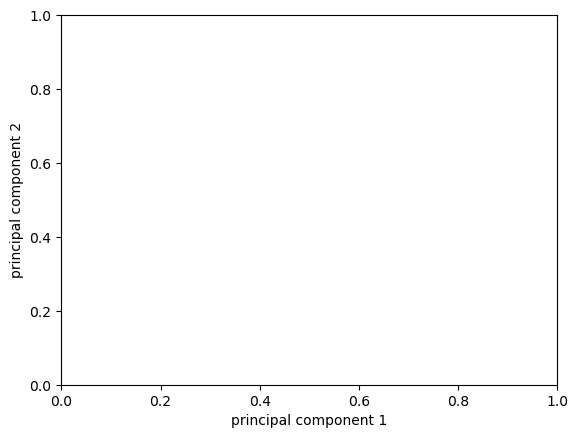

In [32]:
# Son olarak da final dataframe'imizi görselleştirip bakalım:

# Basit bir çizim yapalım.

dfsetosa = final_dataframe[df.target == "Iris-setosa"]
dfvirginica = final_dataframe[df.target == "Iris-virginica"]
dfversicolor = final_dataframe[df.target == "Iris-versicolor"]
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")


plt.scatter(dfsetosa["principal component 1 "], dfsetosa["principal component 2 "],color="green")
plt.scatter(dfvirginica["principal component 1"], dfvirginica["principal component 2"],color="red")
plt.scatter(dfversicolor["principal component 1"], dfversicolor["principal component 2"],color="blue")

In [34]:
# üstte hata verdi ama bulamadım hatayı. farklı şekilde görelleştirmeyi yapmaya deneyeceğim. 

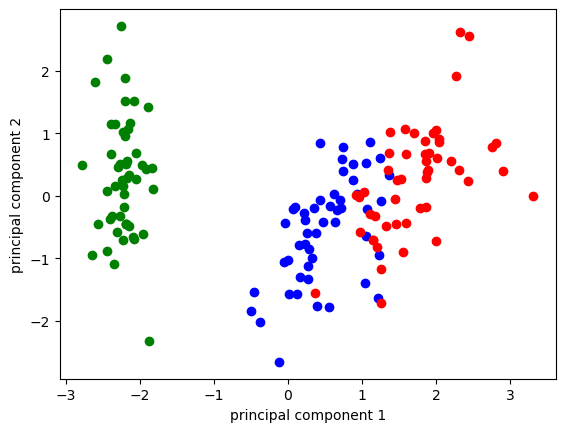

In [36]:
targets = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
colors = ["g", "b", "r"]

plt.xlabel("principal component 1")
plt.ylabel("principal component 2")


for target, col in zip(targets, colors):
    dftemp = final_dataframe[df.target==target]
    plt.scatter(dftemp["principal component 1"], dftemp["principal component 2"], color=col)